### S1: To understand the business problem-

In [ ]:
# Application: Now company is predict price manually, data has features like
# no. of bathroom, no. of windows etc. 
# so we have to build ml model to predict accurate price based on feature

### S2: ML framing- 

In [2]:
import numpy as np
import pandas as pd

### S3: Data Collection- 
Structured 

In [3]:
hos_raw = pd.read_csv('BostonHousing.csv')

In [4]:
hos_raw.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [8]:
hos_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


In [9]:
hos_raw['chas'].value_counts()

0    471
1     35
Name: chas, dtype: int64

In [11]:
hos_raw.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


array([[<AxesSubplot:title={'center':'crim'}>,
        <AxesSubplot:title={'center':'zn'}>,
        <AxesSubplot:title={'center':'indus'}>,
        <AxesSubplot:title={'center':'chas'}>],
       [<AxesSubplot:title={'center':'nox'}>,
        <AxesSubplot:title={'center':'rm'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'dis'}>],
       [<AxesSubplot:title={'center':'rad'}>,
        <AxesSubplot:title={'center':'tax'}>,
        <AxesSubplot:title={'center':'ptratio'}>,
        <AxesSubplot:title={'center':'b'}>],
       [<AxesSubplot:title={'center':'lstat'}>,
        <AxesSubplot:title={'center':'medv'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

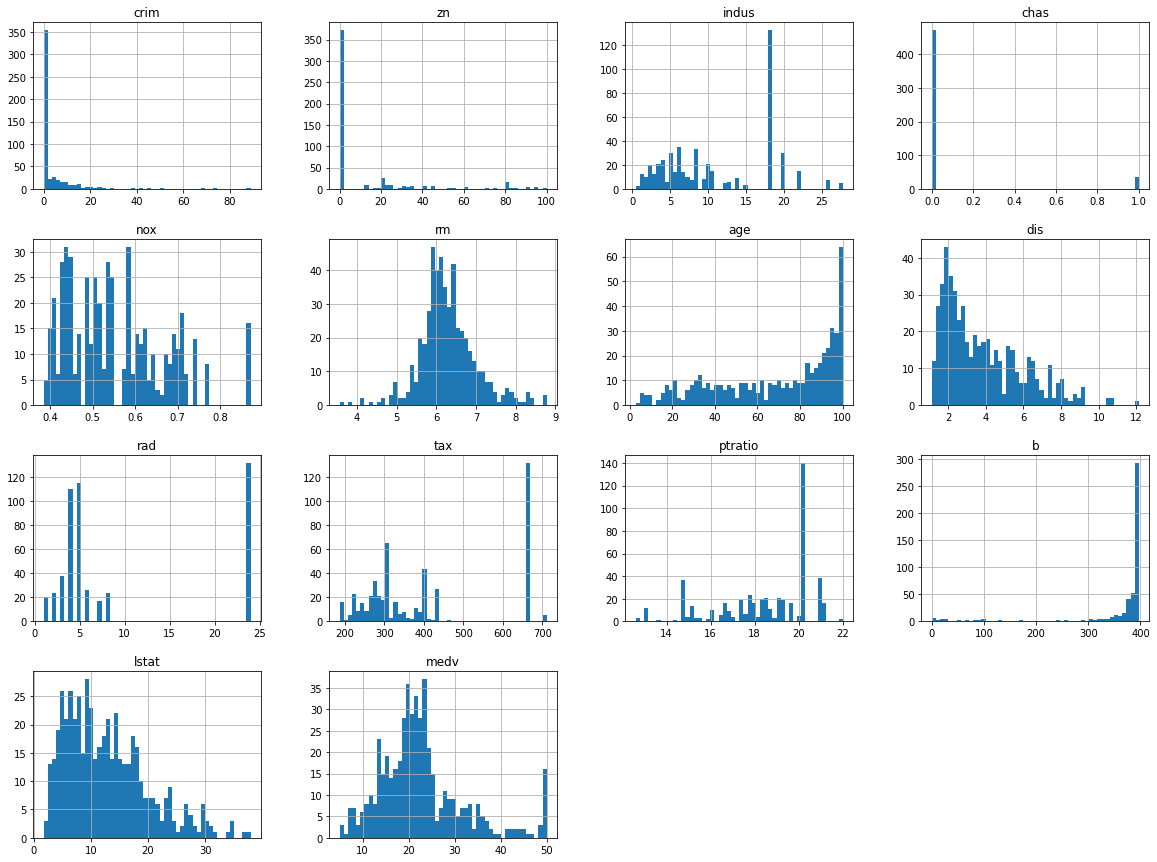

In [12]:
hos_raw.hist(bins=50, figsize=(20,15) )

### S4: Data Preparation
- Impute missing - median
- Shuffle 
- Training data cross Validation
    

In [14]:
import numpy as np

In [3]:
### This is manual method to split dataset into training and testing

In [15]:
# for learning purpose
def split_train_test(data, test_ratio):
    np.random.seed(42)
    shuffled = np.random.permutation(len(data))
    test_set_size = int(len(data)*test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]


In [17]:
#train_set, test_set = split_train_test(hos_raw, 0.2)

In [21]:
print(f"Row in trian set:  {len(train_set)}\nRows in test set: {len(test_set)}" )

Row in trian set:  405
Rows in test set: 101


In [22]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(hos_raw,test_size = 0.2, random_state=42)
print(f"Row in trian set:  {len(train_set)}\nRows in test set: {len(test_set)}" )

Row in trian set:  404
Rows in test set: 102


### statify sampling, like chase has few 1 values, so it should be devide 
- on test and train equally

In [28]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(hos_raw, hos_raw['chas']):
    strat_train_set = hos_raw.loc[train_index]
    strat_test_set = hos_raw.loc[test_index]

In [32]:
strat_test_set['chas'].value_counts()

0    95
1     7
Name: chas, dtype: int64

In [ ]:
housing = strat_train_set.copy()

In [53]:
# it could be used on for pipline and to do fillna

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'median')
imputer.fit(hos_raw)

imputer.statistics_ 

SimpleImputer(strategy='median')

In [ ]:
## Standardise the model

from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler())
])

### S5: Data Visualzation

In [33]:
### Looking for Correlations

In [38]:
corr_matrix = hos_raw.corr()
corr_matrix['medv'].sort_values(ascending=False)
## to check corr in between.

medv       1.000000
rm         0.695360
zn         0.360445
b          0.333461
dis        0.249929
chas       0.175260
age       -0.376955
rad       -0.381626
crim      -0.388305
nox       -0.427321
tax       -0.468536
indus     -0.483725
ptratio   -0.507787
lstat     -0.737663
Name: medv, dtype: float64

array([[<AxesSubplot:xlabel='medv', ylabel='medv'>,
        <AxesSubplot:xlabel='rm', ylabel='medv'>,
        <AxesSubplot:xlabel='zn', ylabel='medv'>,
        <AxesSubplot:xlabel='lstat', ylabel='medv'>],
       [<AxesSubplot:xlabel='medv', ylabel='rm'>,
        <AxesSubplot:xlabel='rm', ylabel='rm'>,
        <AxesSubplot:xlabel='zn', ylabel='rm'>,
        <AxesSubplot:xlabel='lstat', ylabel='rm'>],
       [<AxesSubplot:xlabel='medv', ylabel='zn'>,
        <AxesSubplot:xlabel='rm', ylabel='zn'>,
        <AxesSubplot:xlabel='zn', ylabel='zn'>,
        <AxesSubplot:xlabel='lstat', ylabel='zn'>],
       [<AxesSubplot:xlabel='medv', ylabel='lstat'>,
        <AxesSubplot:xlabel='rm', ylabel='lstat'>,
        <AxesSubplot:xlabel='zn', ylabel='lstat'>,
        <AxesSubplot:xlabel='lstat', ylabel='lstat'>]], dtype=object)

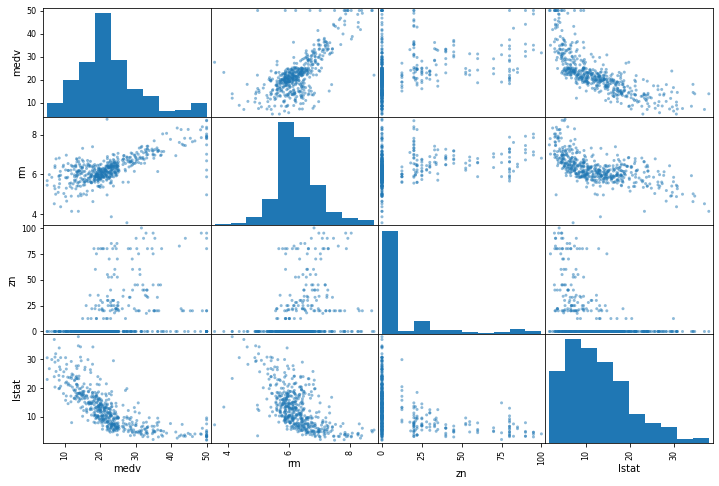

In [41]:
from pandas.plotting import scatter_matrix
attributes = ['medv','rm','zn','lstat']
scatter_matrix(hos_raw[attributes], figsize = (12,8))

<AxesSubplot:xlabel='rm', ylabel='medv'>

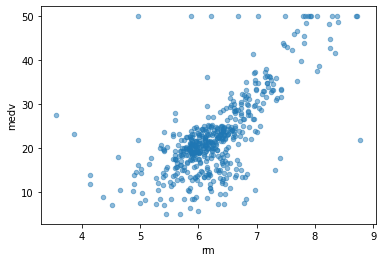

In [44]:
hos_raw.plot(kind='scatter', x='rm', y='medv', alpha=0.5)

### S6: Feature Engineering
- Add new label

In [45]:
hos_raw['taxrm'] = hos_raw['tax']/hos_raw['rm']
hos_raw.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,taxrm
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,45.019011
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,37.688834
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,33.681280
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,31.723350
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,31.061984


In [48]:
corr_matrix =  hos_raw.corr()
corr_matrix['medv'].sort_values(ascending=False)

# taxrm is highly -vely correlated with medv

medv       1.000000
rm         0.695360
zn         0.360445
b          0.333461
dis        0.249929
chas       0.175260
age       -0.376955
rad       -0.381626
crim      -0.388305
nox       -0.427321
tax       -0.468536
indus     -0.483725
ptratio   -0.507787
taxrm     -0.537650
lstat     -0.737663
Name: medv, dtype: float64

In [ ]:
# to consider taxrm and drop medv and label medv 

In [64]:
hos_raw = strat_train_set.drop('medv', axis = 1)
housing_labels = strat_train_set['medv'].copy()

<AxesSubplot:xlabel='taxrm', ylabel='medv'>

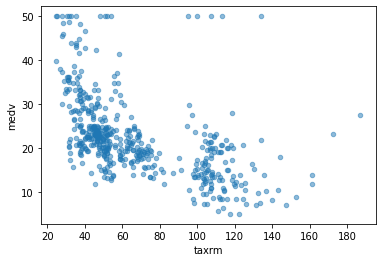

In [49]:
hos_raw.plot(kind='scatter', x='taxrm', y='medv', alpha=0.5)

array([2.56510000e-01, 0.00000000e+00, 9.69000000e+00, 0.00000000e+00,
       5.38000000e-01, 6.20850000e+00, 7.75000000e+01, 3.20745000e+00,
       5.00000000e+00, 3.30000000e+02, 1.90500000e+01, 3.91440000e+02,
       1.13600000e+01, 2.12000000e+01, 5.35914169e+01])

In [56]:
## Creating pipeline

In [65]:
from sklearn.pipeline import Pipeline
# feature scaling 
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler())
])


In [66]:
housing_num_tr = my_pipeline.fit_transform(hos_raw)
housing_num_tr

array([[-0.43942006,  3.12628155, -1.12165014, ..., -0.97491834,
         0.41164221, -0.86091034],
       [-0.44352175,  3.12628155, -1.35893781, ..., -0.69277865,
         0.39131918, -0.94116739],
       [ 0.15682292, -0.4898311 ,  0.98336806, ...,  0.81196637,
         0.44624347,  0.81480158],
       ...,
       [-0.43525657, -0.4898311 , -1.23083158, ..., -0.22254583,
         0.41831233, -1.27603303],
       [ 0.14210728, -0.4898311 ,  0.98336806, ...,  0.81196637,
        -3.15239177,  0.73869575],
       [-0.43974024, -0.4898311 ,  0.37049623, ..., -0.97491834,
         0.41070422,  0.09940681]])

In [ ]:
## Selecting a desired model for Real Estates

In [67]:
housing_num_tr.shape

(404, 13)

### S7: Model Training

In [70]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(housing_num_tr, housing_labels)

LinearRegression()

In [71]:
some_data = hos_raw.iloc[:5]

In [72]:
some_labels = housing_labels.iloc[:5]

In [73]:
prepared_data = my_pipeline.transform(some_data)

In [74]:
model.predict(prepared_data)

array([23.94996893, 27.21690623, 20.58079789, 25.04088721, 23.76177838])

In [76]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

### S8: Model Evaluation
- Evaluating the model

In [78]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)

In [79]:
lin_mse

23.322346079233675

In [ ]:
## for linear Regression lin_mse = 23, which is pretty higher

In [80]:
# Using better evaluation techniques -Cross Validation

In [81]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num_tr, housing_labels,
                        scoring="neg_mean_squared_error", cv =10)
rmse_scores = np.sqrt(-scores)
# to maximise ultility 

In [82]:
rmse_scores

array([4.21674442, 4.26026816, 5.1071608 , 3.82881892, 5.34093789,
       4.3785611 , 7.47384779, 5.48226252, 4.14885722, 6.0669122 ])

In [84]:
# apply cross validation with linearRegrssion

In [85]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
model = LinearRegression()
model.fit(housing_num_tr, housing_labels)

LinearRegression()

In [86]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num_tr, housing_labels,
                        scoring="neg_mean_squared_error", cv =10)
rmse_scores = np.sqrt(-scores)
# to maximise ultility 

In [87]:
rmse_scores

array([4.21674442, 4.26026816, 5.1071608 , 3.82881892, 5.34093789,
       4.3785611 , 7.47384779, 5.48226252, 4.14885722, 6.0669122 ])

### S9: Business Goal Evaluation

In [89]:
## Saving the model

In [88]:
from joblib import dump, load
dump(model, 'real_estate.joblib')

['real_estate.joblib']

In [90]:
### Testing the model on test data

In [91]:
X_test = strat_test_set.drop('medv', axis =1)
Y_test = strat_test_set['medv'].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [93]:
final_rmse

4.143819554319326

In [94]:
print(final_predictions, list(Y_test))

[22.69663678 17.22600313 30.02303718 30.72767895  8.8510416  13.31467014
 17.29615732 17.74740541 32.49300647 36.05576682 16.37971118  0.55763712
 22.98231849 20.44805414 20.04676103 12.94089562 31.14959131 13.42383778
 25.02732037 24.1680579  20.41663802 17.05356046 17.82193794 25.60370774
 19.51063444 32.83523603 19.43372437 33.72021979  8.02922445 34.67322625
 19.51326153 21.4383898  29.31429776 16.35664997 26.98334343 18.35632929
 37.3141123  24.56541978 22.2186496  37.13515388 25.15918226 34.48919537
 23.4490451  24.01052594 18.52058894 32.69367712 38.47436972 21.39603535
 17.65060105 16.24434034 21.24195102 12.40190011 19.88486433 20.40554849
 27.94261106 33.08938174 40.13445849 31.36345155 14.94004062 19.73822665
 40.48290495 18.11543107 15.13757279 27.66353013 19.49519021 32.50860212
 23.40912101 20.30670328 21.16556351 33.78834117 34.10260096 27.63685041
 24.51460463 21.88751595 36.17309546  8.58176976 17.42620124 21.46806914
 20.54643262 23.00127296 25.98733788 22.55143049 14

In [95]:
prepared_data[0]

array([-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.24141041, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034])

In [96]:
# using the model

from joblib import dump,load
import numpy as np
model = load('real_estate.joblib')
features = np.array([[-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.24141041, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034]])
model.predict(features)


array([23.94996896])